# Alignment (as a function of classes)

In [1]:
import sys, os
sys.path.append('/home/luthra/understanding_ssl_v2/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [99]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(nscl_train, nscl_test,
            nscl_train_std, nscl_test_std,
            epoch_ranges_dict,
            n_ways=[2,4,6,8,10],
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(14, 11))

    x = []
    for i in n_ways:
        # if i==4 or i==6:
        #     x.append(5)
        # else:
        x.append(i)

    # Color Choices for Better Contrast
    color_choices = ['black', 'blue', 'purple', 'orange', 'red', 'green', 'brown', 'gray', 'olive', 'cyan']
    
    for range_key, epochs in epoch_ranges_dict.items():
        g1 = sns.lineplot(x=x, y=nscl_train[range_key], alpha=1.0, color=color_choices[range_key],
                          markersize=8, linewidth=2.0)
        g2 = sns.lineplot(x=x, y=nscl_test[range_key], alpha=0.75, linestyle='--', color=color_choices[range_key],
                          markersize=8, linewidth=2.0)

    set_border(plt.gca())

    # Epoch legends
    handles=[]
    for range_key, epochs in epoch_ranges_dict.items():
        if range_key == 0:
            epoch_label = "Epoch 0"
        elif range_key == 1:
            epoch_label = "Epochs [10-50]"
        elif range_key == 2:
            epoch_label = "Epochs [50-100]"
        elif range_key == 3:
            epoch_label = "Epochs [100-500]"
        elif range_key == 4:
            epoch_label = "Epochs [500-1000]"
        handles.append(mlines.Line2D([], [], color=color_choices[range_key], linestyle='-', label=epoch_label))

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'lower right', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'lower right', fontsize=30, bbox_to_anchor=(0.51, 0.0))
    plt.yscale('log')
    # Format y-axis ticks to one decimal place (e.g., 0.1, 0.2)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    plt.gca().yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
    # write latex code in x label
    plt.xticks(x, fontsize=26)
    plt.xlabel(r"Number of Classes $C$")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    plt.grid(True, which='both', linestyle='-', linewidth=0.75)
    plt.show()

In [100]:
all_datasets = ['cifar10', 'cifar100', 'tiny_imagenet', 'mini_imagenet']
dataset = all_datasets[0]

In [101]:
logs_dir = f'../results/{dataset}/alignment_parallel'
nscl_rsa_train = defaultdict(list)
nscl_rsa_train_std = defaultdict(list)
nscl_rsa_test = defaultdict(list)
nscl_rsa_test_std = defaultdict(list)
nscl_cka_train = defaultdict(list)
nscl_cka_train_std = defaultdict(list)
nscl_cka_test = defaultdict(list)
nscl_cka_test_std = defaultdict(list)

epoch_ranges_dict = {0:[0],
                    1: [10,20,30,40,50],
                    2: [60,70,80,90],
                    3: [200,400],
                    4: [600, 800,1000]}
if dataset=='cifar10':
    N_ways = [2, 4, 6, 8,10]
elif dataset=='cifar100' or dataset=='mini_imagenet':
    N_ways = [4,10,50,100]
elif dataset=='tiny_imagenet':
    N_ways = [6,10,50,100,200]
for n in N_ways[:-1]:  # exclude full data
    n_way_path = os.path.join(logs_dir, f'{n}_way')
    train_df = pd.read_csv(f'{n_way_path}/train_alignment.csv', index_col='Epoch')
    test_df = pd.read_csv(f'{n_way_path}/test_alignment.csv', index_col='Epoch')
    for range_key, epochs in epoch_ranges_dict.items():
        # get average and std for the epoch range
        nscl_rsa_train[range_key].append(train_df.loc[epochs]['NSCL_RSA'].mean())
        nscl_rsa_train_std[range_key].append(train_df.loc[epochs]['NSCL_RSA'].std())
        nscl_rsa_test[range_key].append(test_df.loc[epochs]['NSCL_RSA'].mean())
        nscl_rsa_test_std[range_key].append(test_df.loc[epochs]['NSCL_RSA'].std())
        nscl_cka_train[range_key].append(train_df.loc[epochs]['NSCL_CKA'].mean())
        nscl_cka_train_std[range_key].append(train_df.loc[epochs]['NSCL_CKA'].std())
        nscl_cka_test[range_key].append(test_df.loc[epochs]['NSCL_CKA'].mean())
        nscl_cka_test_std[range_key].append(test_df.loc[epochs]['NSCL_CKA'].std())

# full data
train_log_file = f'../results/{dataset}/alignment/train_alignment.csv'
test_log_file = f'../results/{dataset}/alignment/test_alignment.csv'
train_df = pd.read_csv(train_log_file, index_col='Epoch')
test_df = pd.read_csv(test_log_file, index_col='Epoch')
for range_key, epochs in epoch_ranges_dict.items():
    # get average and std for the epoch range
    nscl_rsa_train[range_key].append(train_df.loc[epochs]['NSCL_RSA'].mean())
    nscl_rsa_train_std[range_key].append(train_df.loc[epochs]['NSCL_RSA'].std())
    nscl_rsa_test[range_key].append(test_df.loc[epochs]['NSCL_RSA'].mean())
    nscl_rsa_test_std[range_key].append(test_df.loc[epochs]['NSCL_RSA'].std())
    nscl_cka_train[range_key].append(train_df.loc[epochs]['NSCL_CKA'].mean())
    nscl_cka_train_std[range_key].append(train_df.loc[epochs]['NSCL_CKA'].std())
    nscl_cka_test[range_key].append(test_df.loc[epochs]['NSCL_CKA'].mean())
    nscl_cka_test_std[range_key].append(test_df.loc[epochs]['NSCL_CKA'].std())

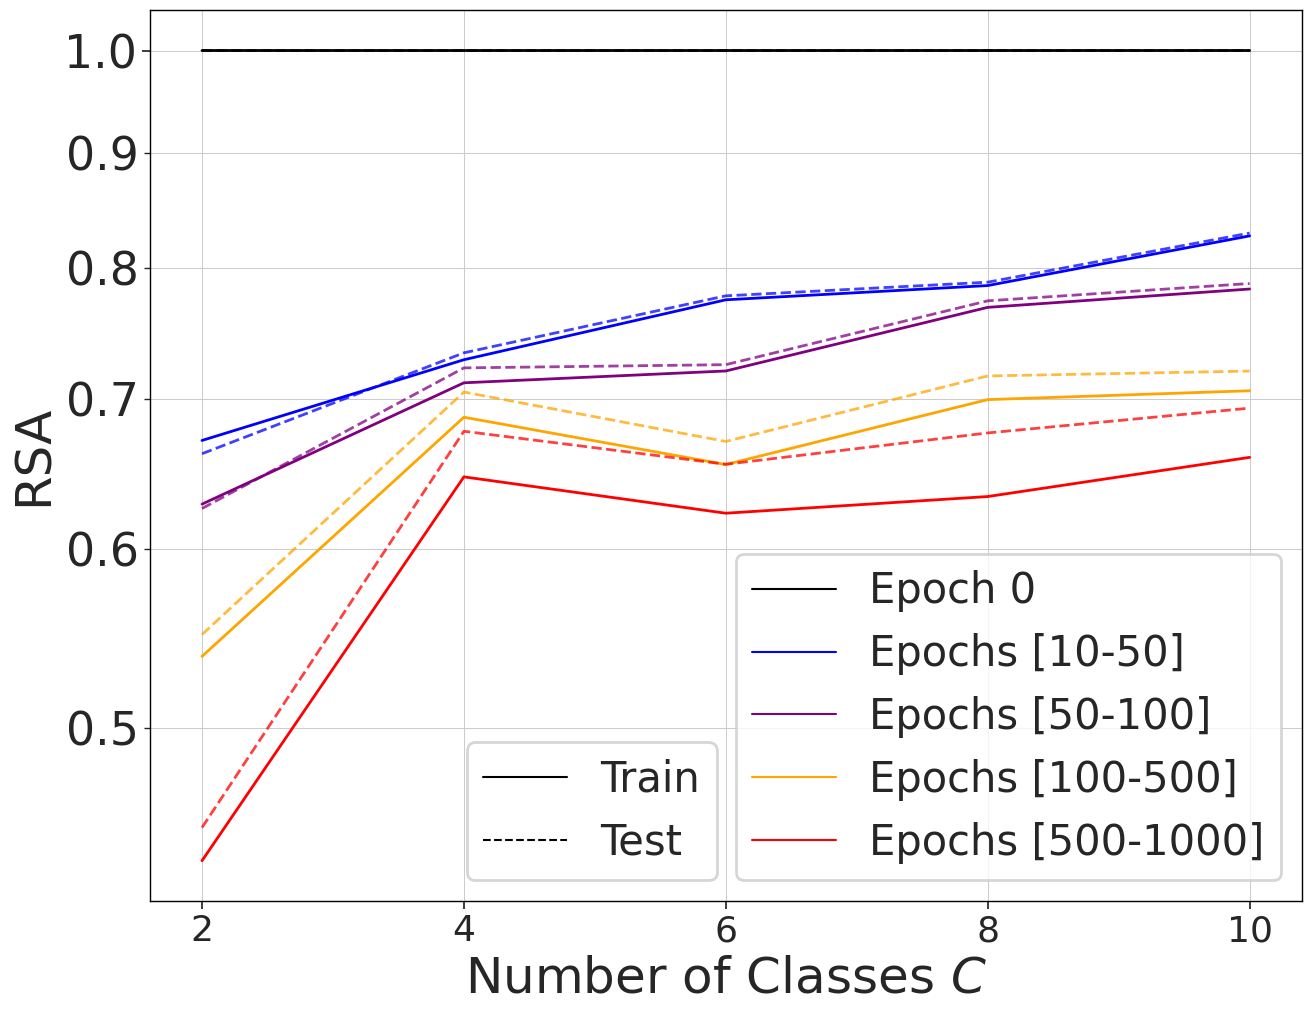

In [102]:
# RSA plot
plot_xy(nscl_rsa_train, nscl_rsa_test,
        nscl_rsa_train_std, nscl_rsa_test_std,
        epoch_ranges_dict,
        n_ways=N_ways,
        y_label='RSA',
        output_path=f'../figures/alignment_over_classes/{dataset}_rsa_plot.pdf')

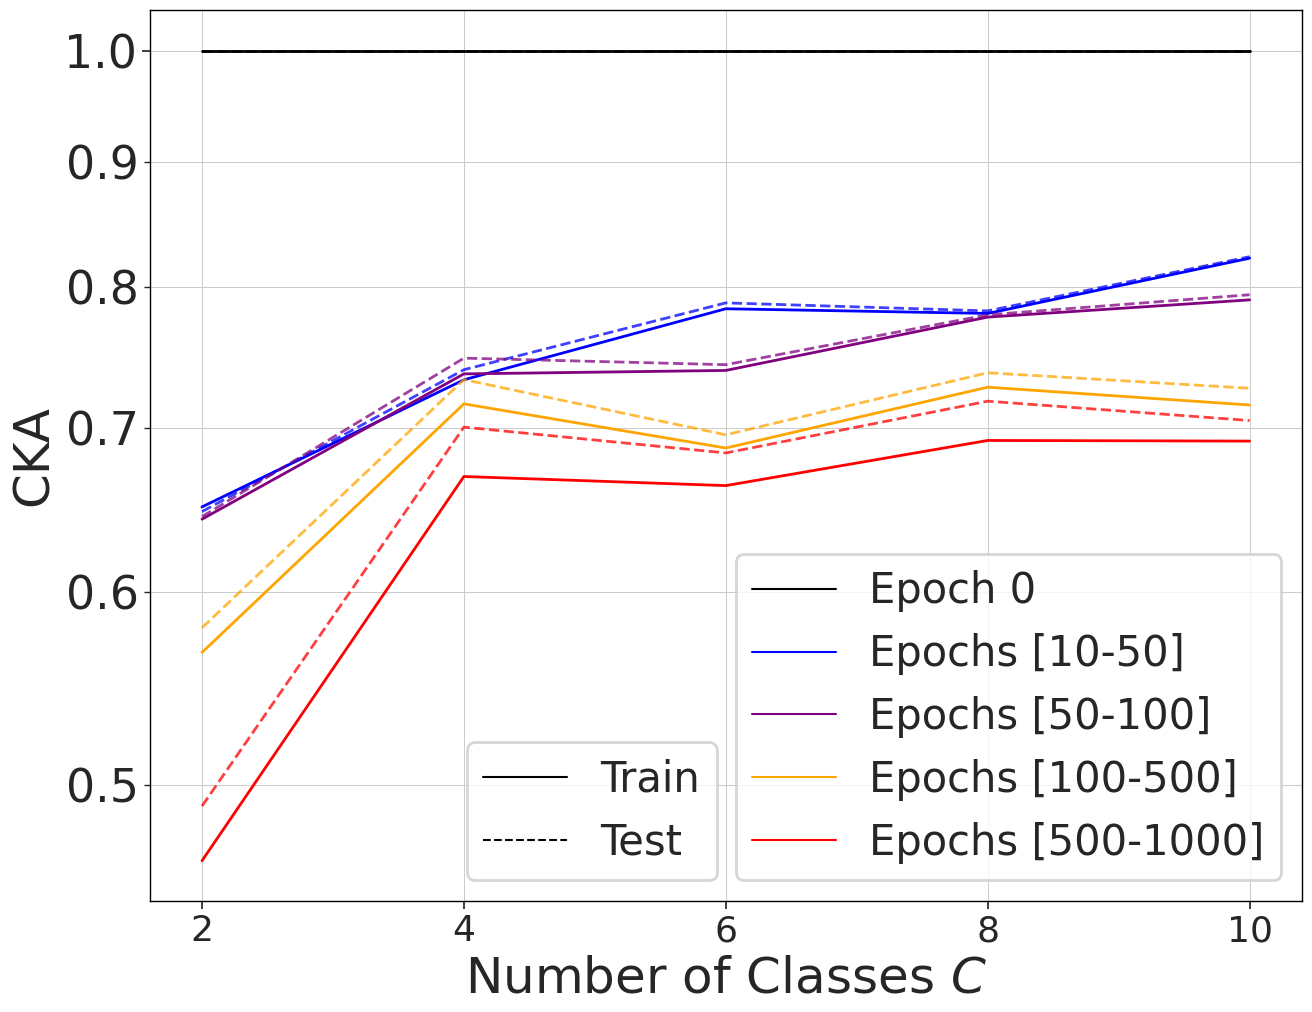

In [103]:
# CKA plot
plot_xy(nscl_cka_train, nscl_cka_test,
        nscl_cka_train_std, nscl_cka_test_std,
        epoch_ranges_dict,
        n_ways=N_ways,
        y_label='CKA',
        output_path=f'../figures/exp1/{dataset}_cka_plot.pdf')

In [79]:
import seaborn as sns
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

def set_border(g):
    for spine in ['top', 'bottom', 'left', 'right']:
        g.spines[spine].set_color('black')
        g.spines[spine].set_linewidth(1)

def plot_xy(nscl_train, nscl_test,
            epochs,
            n_ways=[2,4,6,8,10],
            y_label='RSA',
            output_path=None):
    
    sns.set_theme(style="whitegrid", font_scale=3.0, rc={"xtick.bottom": True, "ytick.left": True})
    sns.set_context(rc={'patch.linewidth': 2.0})
    
    plt.figure(figsize=(14, 11))

    x = [i+1 for i in epochs]

    # Color Choices for Better Contrast
    color_choices = ['green', 'blue', 'purple', 'orange', 'red', 'green', 'brown', 'gray', 'olive', 'cyan']
    
    for n in range(len(n_ways)):
        g1 = sns.lineplot(x=x, y=nscl_train[n_ways[n]], alpha=1.0, color=color_choices[n],
                          markersize=8, linewidth=2.0)
        g2 = sns.lineplot(x=x, y=nscl_test[n_ways[n]], alpha=0.75, linestyle='--', color=color_choices[n],
                          markersize=8, linewidth=2.0)

    set_border(plt.gca())

    # Epoch legends
    handles=[]
    for n in range(len(n_ways)):
        handles.append(mlines.Line2D([], [], color=color_choices[n], linestyle='-', label=f"{n_ways[n]}-way"))

    style_handles = [
        mlines.Line2D([], [], color='black', linestyle='-', label='Train'),
        mlines.Line2D([], [], color='black', linestyle='--', label='Test')
    ]

    legend1 = plt.legend(handles = handles, loc = 'lower left', fontsize=30)
    plt.gca().add_artist(legend1)
    plt.legend(handles=style_handles, loc = 'lower left', fontsize=30, bbox_to_anchor=(0.3, 0.0))
    plt.xscale('log')
    # Format y-axis ticks to one decimal place (e.g., 0.1, 0.2)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    plt.gca().yaxis.set_minor_formatter(mticker.FormatStrFormatter('%.1f'))
    # write latex code in x label
    plt.xlabel("Training epochs")
    plt.ylabel(f"{y_label}")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, bbox_inches='tight')
    # plt.grid(True, which='both', linestyle='-', linewidth=0.75)
    plt.show()

In [80]:
logs_dir = f'../results/{dataset}/alignment_parallel'
nscl_rsa_train = defaultdict(list)
nscl_rsa_test = defaultdict(list)
nscl_cka_train = defaultdict(list)
nscl_cka_test = defaultdict(list)
epochs = [0, 10, 60, 90, 200, 400, 1000]
N_ways = [2, 4, 6, 8]
for n in N_ways:
    n_way_path = os.path.join(logs_dir, f'{n}_way')
    train_df = pd.read_csv(f'{n_way_path}/train_alignment.csv', index_col='Epoch')
    test_df = pd.read_csv(f'{n_way_path}/test_alignment.csv', index_col='Epoch')
    for epoch in epochs:
        nscl_rsa_train[n].append(train_df.loc[epoch]['NSCL_RSA'])
        nscl_rsa_test[n].append(test_df.loc[epoch]['NSCL_RSA'])
        nscl_cka_train[n].append(train_df.loc[epoch]['NSCL_CKA'])
        nscl_cka_test[n].append(test_df.loc[epoch]['NSCL_CKA'])

# full data
train_log_file = f'../results/{dataset}/alignment/train_alignment.csv'
test_log_file = f'../results/{dataset}/alignment/test_alignment.csv'
train_df = pd.read_csv(train_log_file, index_col='Epoch')
test_df = pd.read_csv(test_log_file, index_col='Epoch')
n=10
for epoch in epochs:
    nscl_rsa_train[n].append(train_df.loc[epoch]['NSCL_RSA'])
    nscl_rsa_test[n].append(test_df.loc[epoch]['NSCL_RSA'])
    nscl_cka_train[n].append(train_df.loc[epoch]['NSCL_CKA'])
    nscl_cka_test[n].append(test_df.loc[epoch]['NSCL_CKA'])
N_ways.append(10)

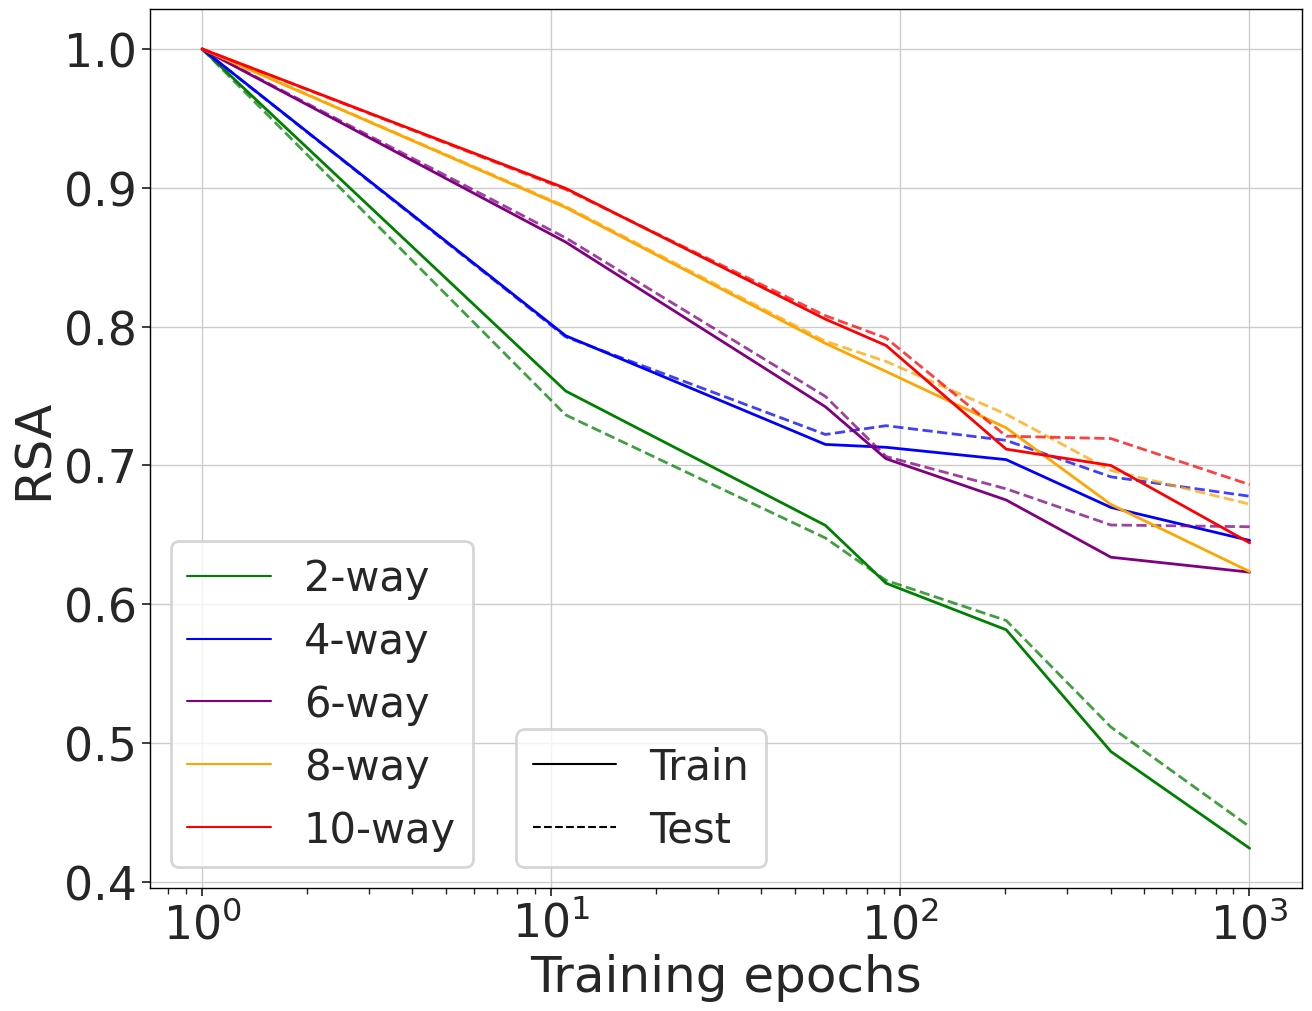

In [81]:
plot_xy(nscl_rsa_train, nscl_rsa_test,
        epochs=epochs,
        n_ways=N_ways,
        y_label='RSA',
        output_path=f'../figures/alignment_over_classes/{dataset}_rsa_epochs_plot.pdf')